### Overview of compounds clinical phase

#### Import modules

In [1]:
import pandas as pd
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 400

### Loading data files

In [4]:
DATA_DIR = '../data/patent_dumps'
FIG_DIR = '../data/figures'
MAPPER_DIR = '../data/mapper'

In [5]:
rare_disease_data = pd.read_csv(f'{DATA_DIR}/orphanet_gene_enumerated_patent_data.tsv', sep='\t')
rare_disease_data.head(2)

,chembl,surechembl,patent_id,date,ipc,assignee,organization_name,acquired_by,person,genes
0,CHEMBL3137316,SCHEMBL1707427,US-20140316139-A1,2014-10-23,C07D 213/89,PFIZER,Pfizer,NaN,NaN,"IL6, NR3C1"
1,CHEMBL3137316,SCHEMBL1707427,US-20140142316-A1,2014-05-22,C07D 213/89,PFIZER,Pfizer,NaN,NaN,"IL6, NR3C1"


In [6]:
alzheimer_disease_data = pd.read_csv(f'{DATA_DIR}/ad_gene_enumerated_patent_data.tsv', sep='\t')
alzheimer_disease_data.head(2)

,chembl,surechembl,patent_id,date,ipc,assignee,organization_name,acquired_by,person,genes
0,CHEMBL1460470,SCHEMBL14919618,US-20140256767-A1,2014-09-11,C07D 401/14,UNIV RUTGERS,Rutgers University,NaN,NaN,"DUSP3, PTPN7, POLB"
1,CHEMBL1460470,SCHEMBL14919618,US-20180148408-A1,2018-05-31,C07D 209/48,UNIV RUTGERS,Rutgers University,NaN,NaN,"DUSP3, PTPN7, POLB"


Drop patents with no assignee names

In [7]:
rare_disease_data.shape, alzheimer_disease_data.shape

((17506, 10), (76321, 10))

In [8]:
rare_disease_data = rare_disease_data[~rare_disease_data['assignee'].isna()]
rare_disease_data.shape

(17375, 10)

In [9]:
alzheimer_disease_data = alzheimer_disease_data[~alzheimer_disease_data['assignee'].isna()]
alzheimer_disease_data.shape

(75616, 10)

### Load compound phase dict

In [10]:
rare_disease_phase_dict = pd.read_csv(
    f'{MAPPER_DIR}/orphanet_chemical_max_phase.tsv', sep='\t',
    index_col='chembl_id'
).to_dict()['max_phase']
len(rare_disease_phase_dict)

4

In [11]:
alzheimer_disease_phase_dict = pd.read_csv(
    f'{MAPPER_DIR}/ad_chemical_max_phase.tsv', sep='\t',
    index_col='chembl_id'
).to_dict()['max_phase']
len(alzheimer_disease_phase_dict)

216

### Mapping compound phases to compound list

In [12]:
def get_compound_phases(df: pd.DataFrame, phase_dict: dict):
    """Map the compounds to their respetive clinical phases based on ChEMBL data."""
    
    phase_data = defaultdict(set)
    
    for chemical in df['chembl'].values:
        phase = phase_dict.get(chemical, 0)

        if phase == 0:
            phase_data['Preclinical'].add(chemical)
        elif phase == 1:
            phase_data['Phase 1'].add(chemical)
        elif phase == 2:
            phase_data['Phase 2'].add(chemical)
        elif phase == 3:
            phase_data['Phase 3'].add(chemical)
        elif phase == 4:
            phase_data['Approved'].add(chemical)
            
    phase_data = [
        {
            'type': i, 
            'count': len(j),
            'compounds': ','.join(j)
        }
        for i, j in phase_data.items()
    ]
    return pd.DataFrame(phase_data)
    

In [13]:
rare_disease_chem_phases = get_compound_phases(
    rare_disease_data, rare_disease_phase_dict
)
rare_disease_chem_phases.head()

,type,count,compounds
0,Phase 2,3,"CHEMBL3137316,CHEMBL286738,CHEMBL2338801"
1,Preclinical,581,"CHEMBL3613922,CHEMBL3946312,CHEMBL3746037,CHEM..."
2,Phase 1,1,CHEMBL3747513


In [14]:
alzheimer_disease_chem_phases = get_compound_phases(
    alzheimer_disease_data, alzheimer_disease_phase_dict
)
alzheimer_disease_chem_phases.head()

,type,count,compounds
0,Preclinical,22715,"CHEMBL4080497,CHEMBL2261742,CHEMBL3647360,CHEM..."
1,Approved,57,"CHEMBL18442,CHEMBL1269025,CHEMBL1770248,CHEMBL..."
2,Phase 3,34,"CHEMBL46618,CHEMBL2087361,CHEMBL301742,CHEMBL2..."
3,Phase 2,79,"CHEMBL4592045,CHEMBL206834,CHEMBL4175981,CHEMB..."
4,Phase 1,45,"CHEMBL598797,CHEMBL2386889,CHEMBL3696475,CHEMB..."


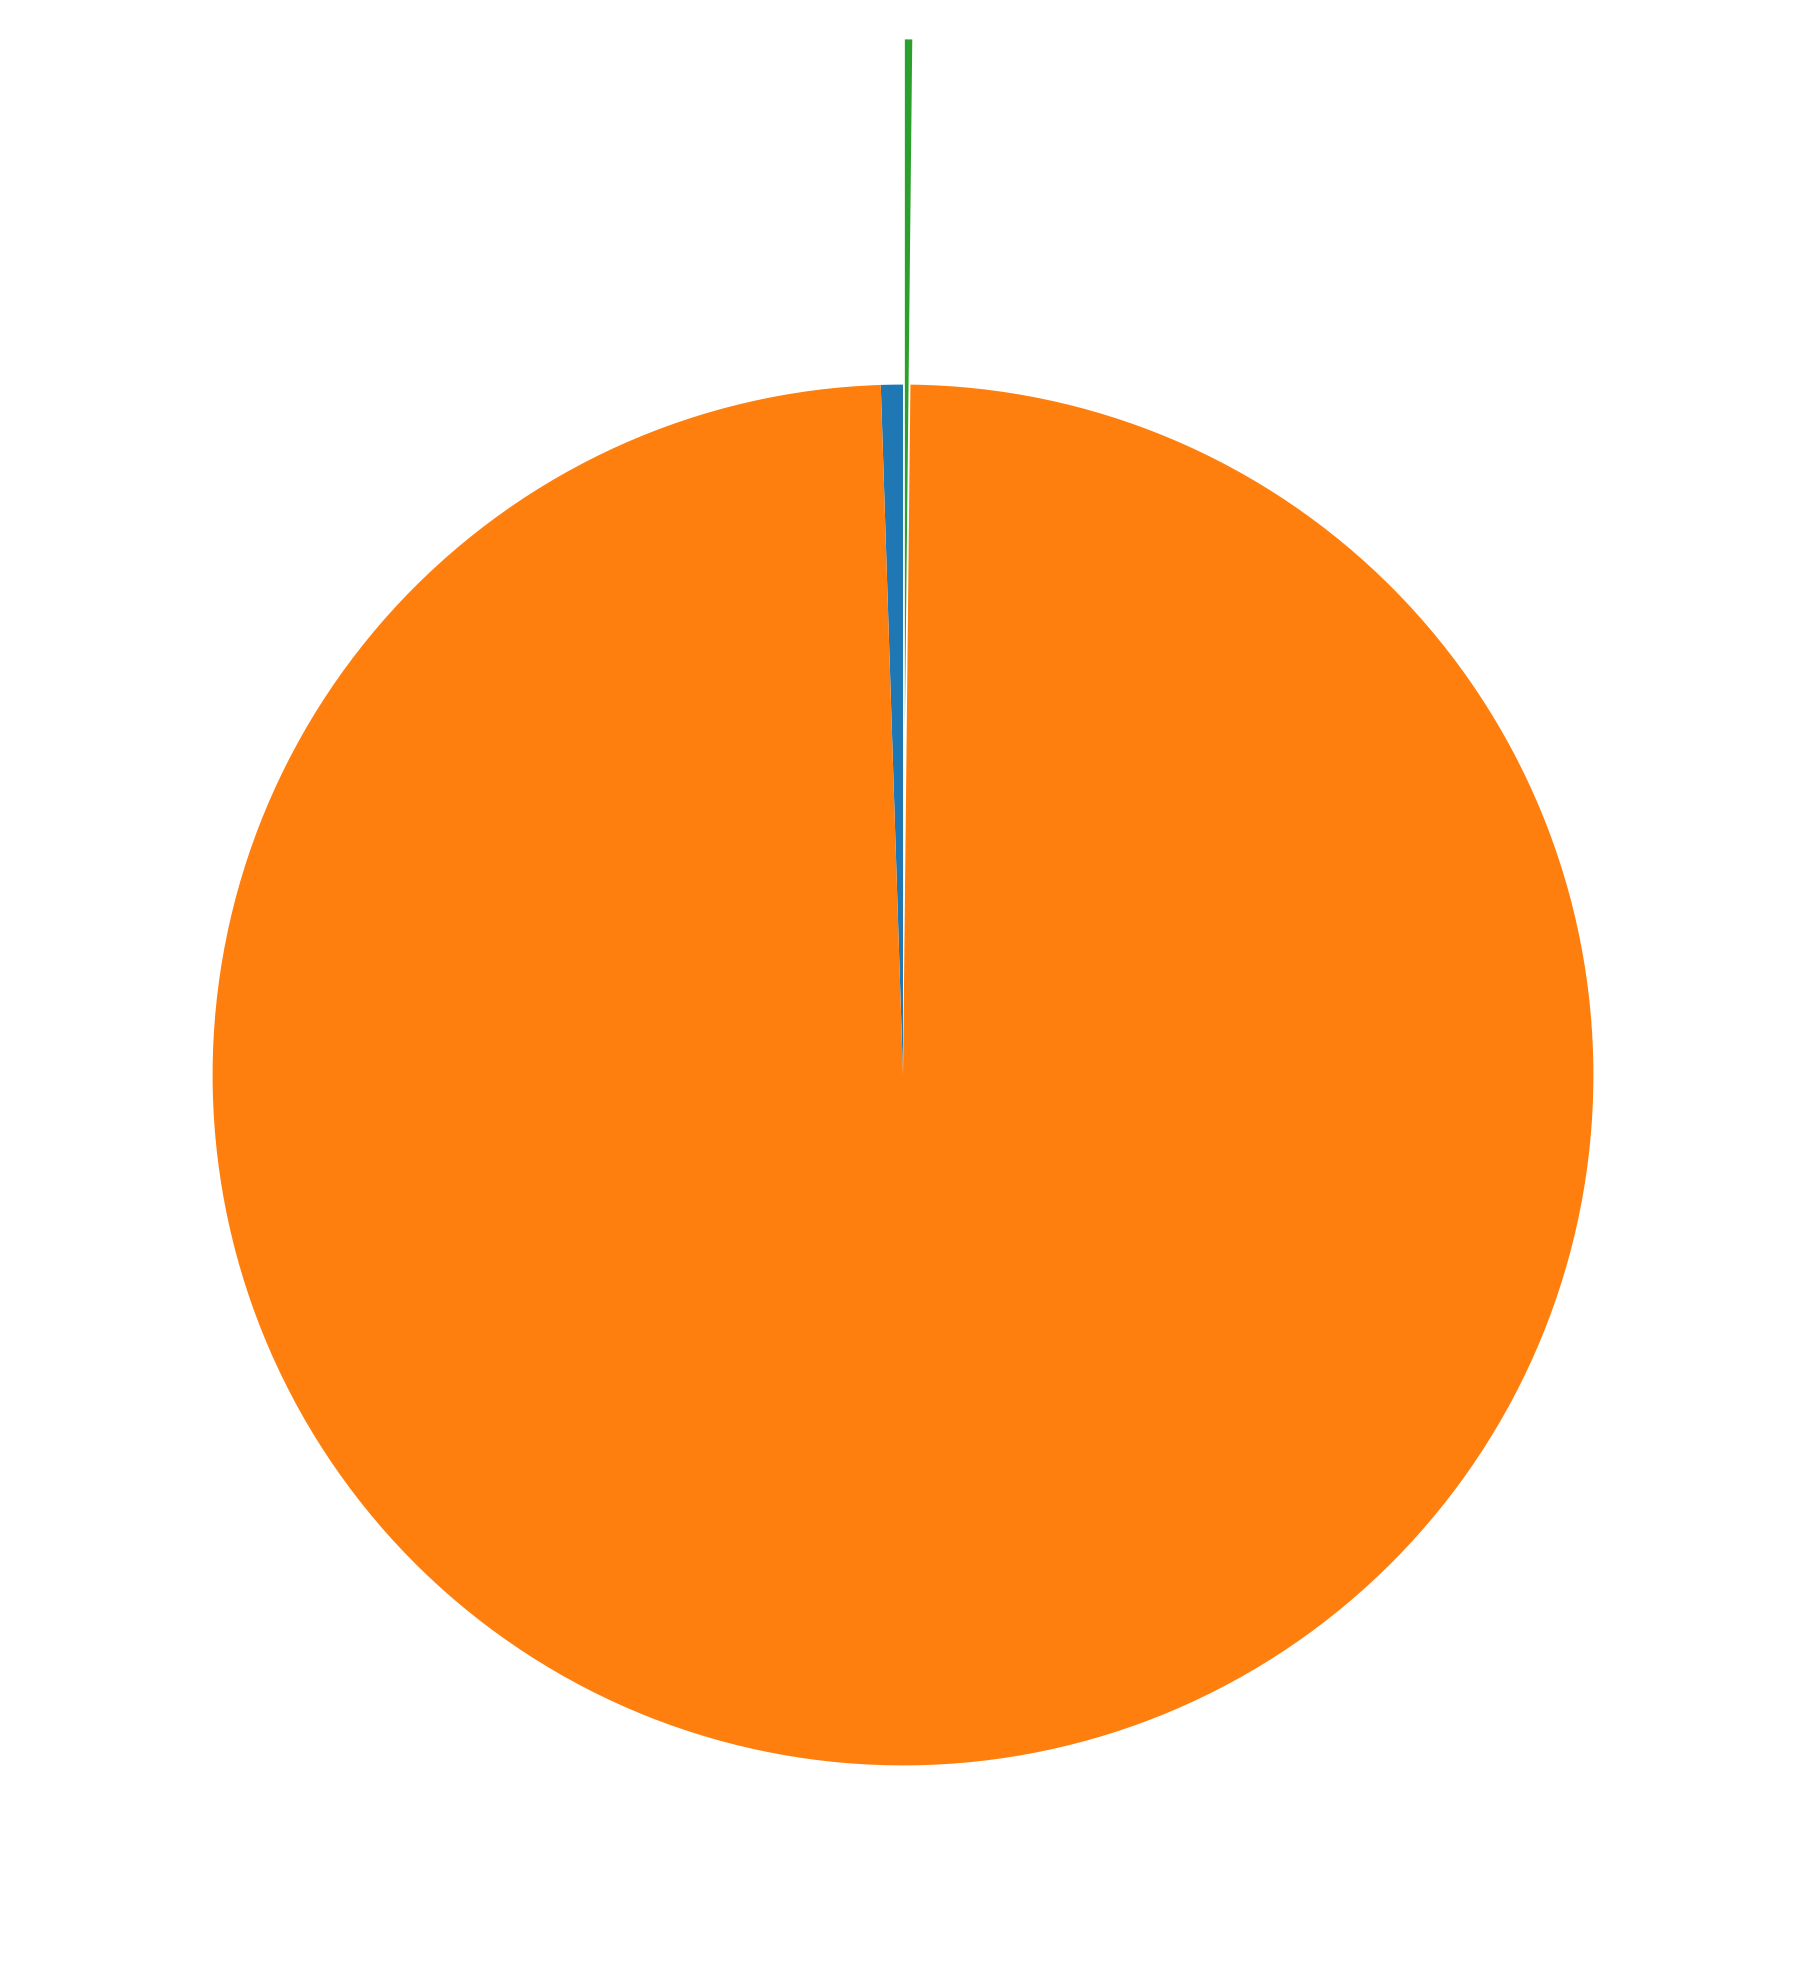

In [15]:
plt.figure(figsize=(5, 5))

plt.pie(
    rare_disease_chem_phases['count'].tolist(),
    labels=['']*3,
    explode=(0, 0, 0.5), startangle=90,
    textprops={'fontsize': 10}
)

plt.tight_layout()

plt.savefig(
    f'{FIG_DIR}/supplementary_figure_4A.png',
    dpi=400,
    bbox_inches='tight', 
)

plt.show()

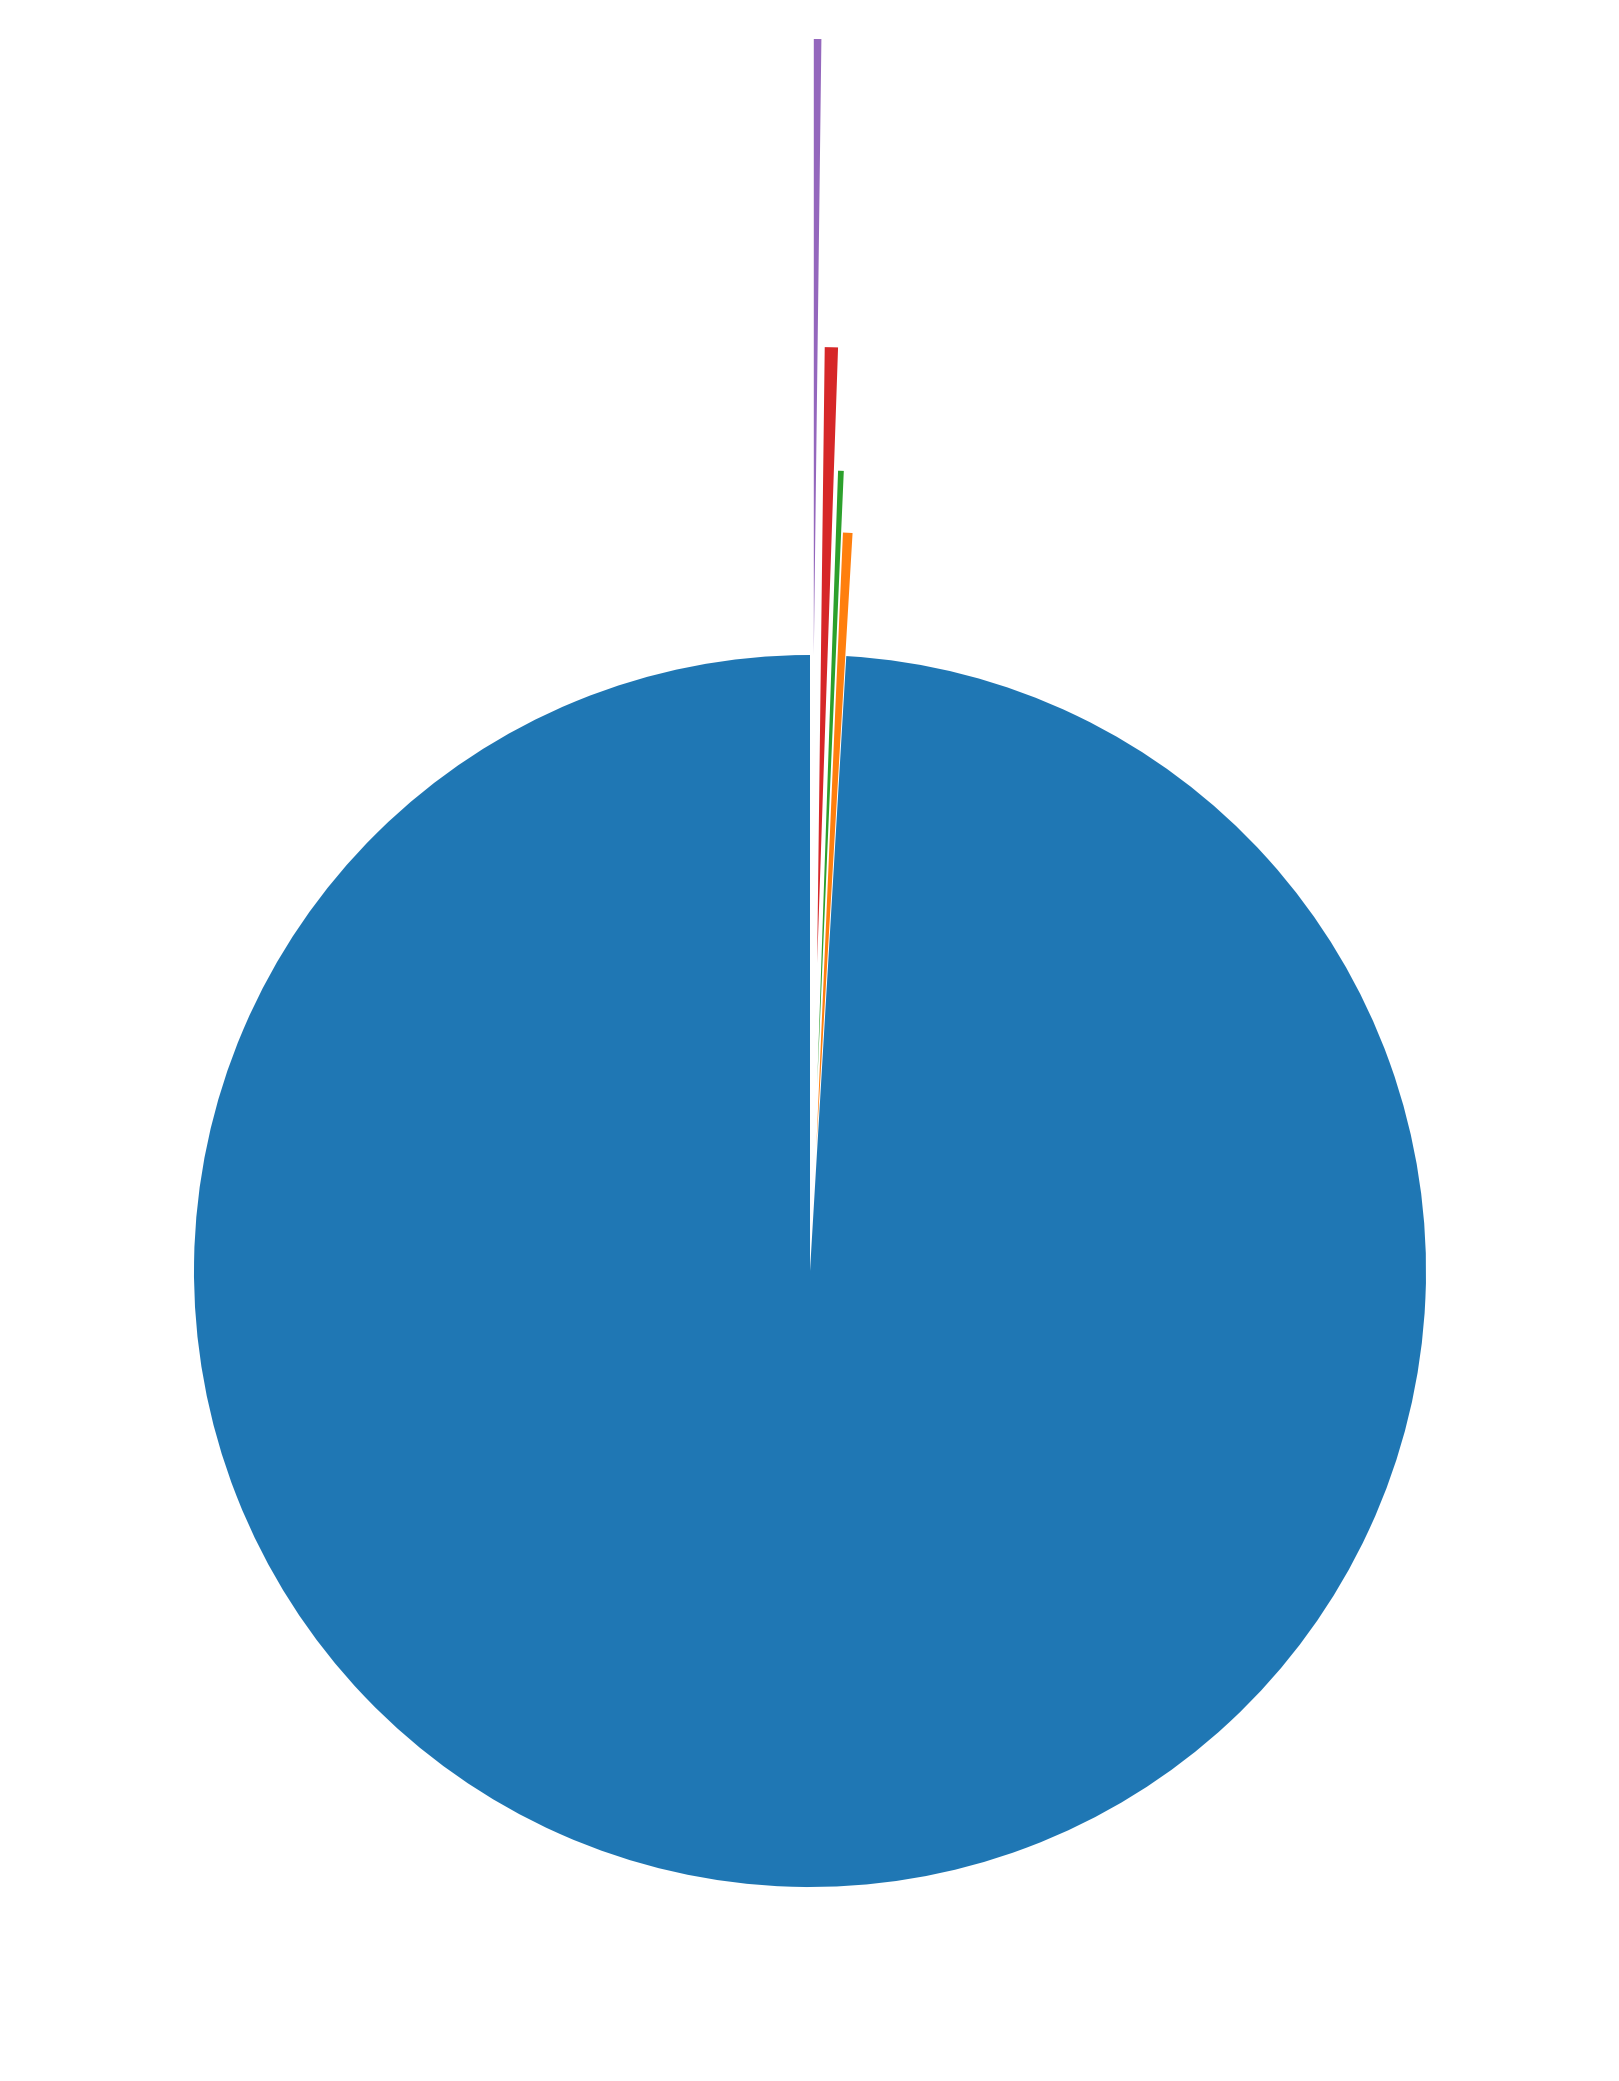

In [16]:
plt.figure(figsize=(5, 5))

plt.pie(
    alzheimer_disease_chem_phases['count'].tolist(),
    labels=['']*5,
    startangle=90,
    textprops={'fontsize': 5}, explode=(0, 0.2, 0.3, 0.5, 1)
)

plt.savefig(
    f'{FIG_DIR}/supplementary_figure_4B.png',
    dpi=400,
    bbox_inches='tight', 
)

plt.show()

In [17]:
rare_disease_chem_phases.to_csv('rare_disease_phase_info.tsv', sep='\t', index=False)
alzheimer_disease_chem_phases.to_csv('ad_phase_info.tsv', sep='\t', index=False)